In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("Cat_human.csv")
df.head()


,Color,Eye_color,Height,Legs,Moustache,Tail,Weight,label
0,black,black,5.14,2,No,No,70.0,human
1,dark_brown,brown,6.80,2,No,No,64.4,human
2,light_brown,brown,5.00,2,Yes,No,64.8,human
3,light_brown,blue,5.90,2,No,No,78.8,human
4,light_brown,blue,6.56,2,No,No,73.2,human


In [2]:
import sklearn.preprocessing as pre_process
ordinal_encoding=pre_process.OrdinalEncoder()
standered_scalling=pre_process.StandardScaler()

In [7]:
from sklearn.compose import make_column_transformer
transform_x=make_column_transformer( (ordinal_encoding , ['Color','Eye_color','Moustache']),
(standered_scalling,['Height','Weight','Legs']))

In [8]:
X=df.iloc[:,0:7]
Y=df.iloc[:,7]
Y.head(4)

0    human
1    human
2    human
3    human
Name: label, dtype: object

In [9]:
processed_x=transform_x.fit_transform(X)

In [ ]:
pd.DataFrame(processed_x)


In [10]:
import numpy as np
ordinal_encoder=pre_process.OrdinalEncoder()
processed_y=ordinal_encoder.fit_transform(np.c_[Y])
processed_y


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [17]:
from sklearn.cluster import KMeans
k = 2
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(processed_x)
y_pred


array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1])

In [18]:
clusters=X
clusters['Label']=y_pred
clusters['orignal label']=processed_y
clusters


,Color,Eye_color,Height,Legs,Moustache,Tail,Weight,Label,orignal label
0,black,black,5.14,2,No,No,70.000000,1,1.0
1,dark_brown,brown,6.80,2,No,No,64.400000,0,1.0
2,light_brown,brown,5.00,2,Yes,No,64.800000,0,1.0
3,light_brown,blue,5.90,2,No,No,78.800000,0,1.0
4,light_brown,blue,6.56,2,No,No,73.200000,0,1.0
...,...,...,...,...,...,...,...,...,...
195,brown,gray,1.14,4,Yes,Yes,2.304511,1,0.0
196,white,yellow,1.39,4,Yes,Yes,5.687970,0,0.0
197,white,black,0.53,4,Yes,Yes,6.364662,0,0.0
198,brown,green,1.03,4,Yes,Yes,6.590226,1,0.0


In [19]:
from sklearn.metrics import silhouette_score
score=[]
k_list=[]
inertia=[]
group=1
for k in range(2,80):
    model = KMeans(n_clusters=k)
    labels = model.fit_predict(processed_x)
    score.append(silhouette_score(processed_x,labels))
    k_list.append(k)
    inertia.append(model.inertia_)
    group=group+1

In [20]:
results=pd.DataFrame({"K":k_list,"score":score,'inertia':inertia})
results

,K,score,inertia
0,2,0.348367,1332.979098
1,3,0.364527,960.543282
2,4,0.413517,699.516400
3,5,0.462022,515.391506
4,6,0.479742,402.295120
...,...,...,...
73,75,0.628557,7.935193
74,76,0.629039,7.381639
75,77,0.623497,7.308291
76,78,0.624821,6.690005


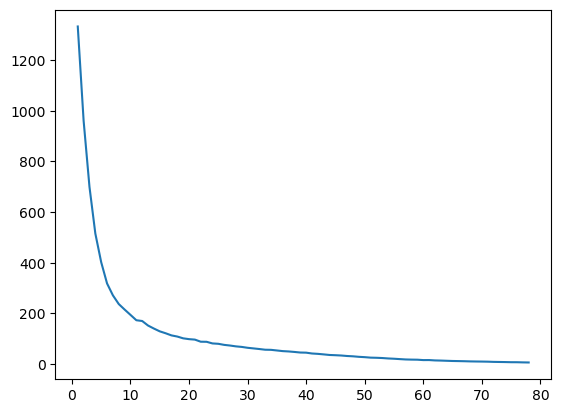

In [21]:
import matplotlib.pyplot as plt
plt.plot(range(1,group),inertia)